In [3]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from statistics import mean
from datetime import date

In [4]:
# start_date = '2021-3-17' # start of TSL3.L history
start_date = '2022-08-08' # start of TSLL history
# start_date = '2023-08-28' # start of TSLR history

hm = {}
for symbol in ['TSLA','TSLL', 'TSLR', 'TSL3.L']:
    ticker = yf.Ticker(symbol)
    history = ticker.history(interval='1wk', start=start_date, end=date.today()) # prices are adjusted for splits
    history.index = history.index.date
    print(f'{symbol}\thistory: {len(history)}w') #\t{ticker.info["currency"]}\t{ticker.info["longName"]}')
    hm[symbol] = history

TSLA	history: 136w
TSLL	history: 136w
TSLR	history: 81w
TSL3.L	history: 136w


TSLA      0.004695
TSLL     -0.051999
TSLR     -0.027288
TSL3.L    0.058870
dtype: float64

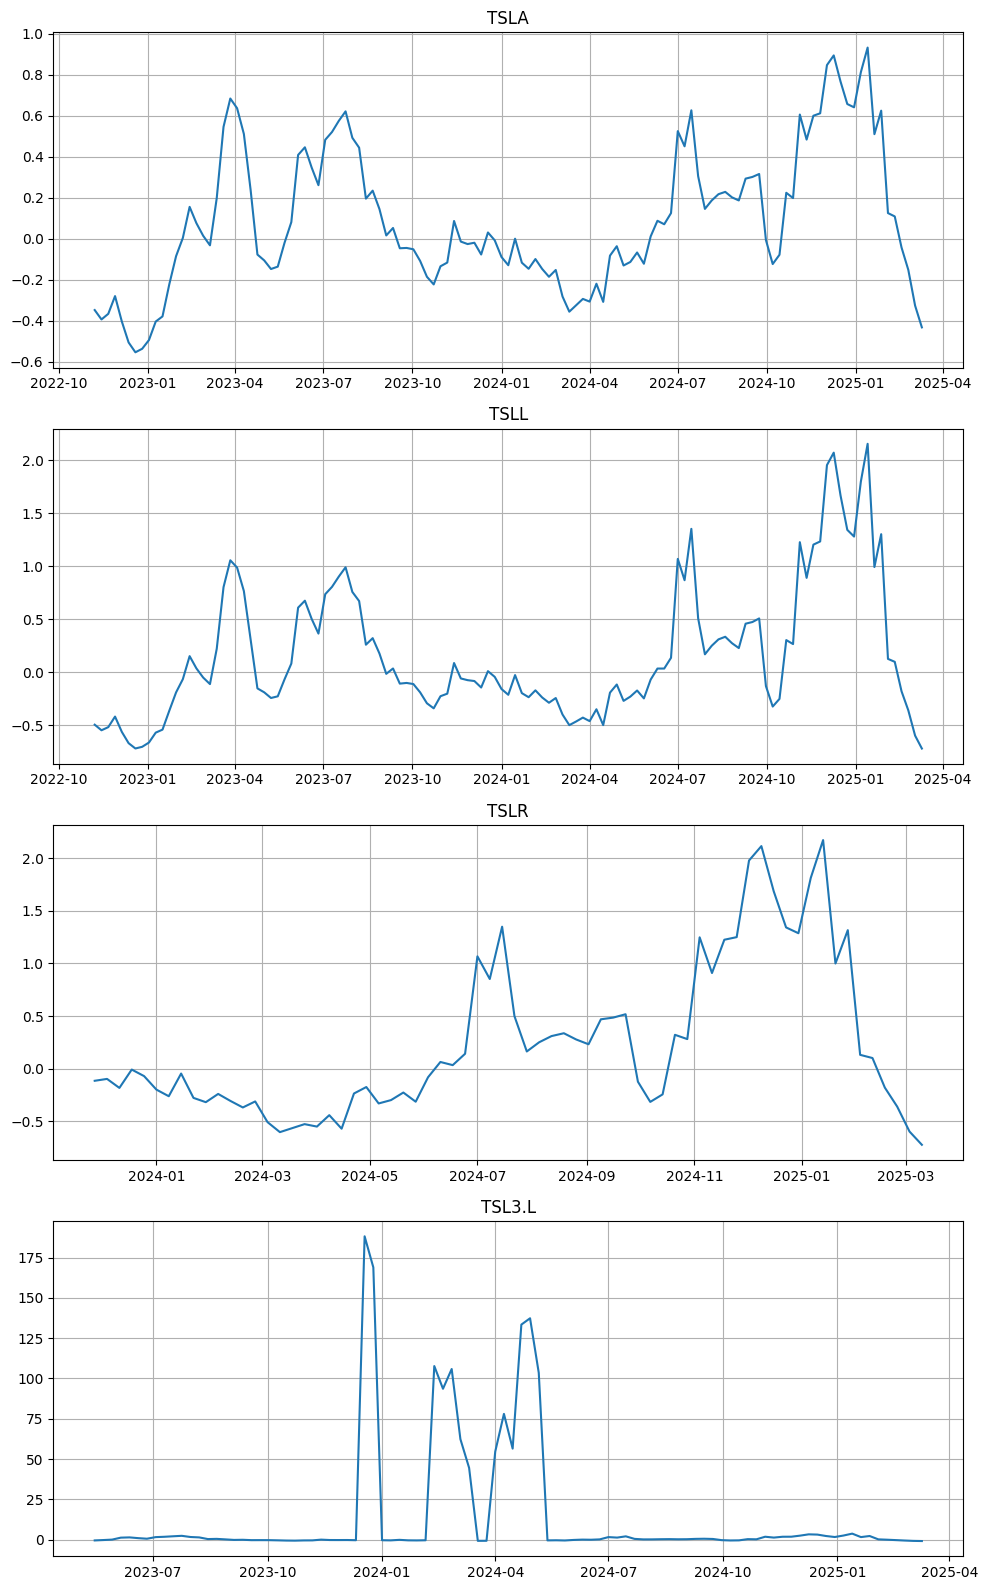

In [5]:
weeks = 13
df = pd.DataFrame({k: v['Close'] for k, v in hm.items()})
prices = df
df = df.pct_change(periods=weeks)

display(df.median())

fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 16))

df['TSLA'].plot(ax=axes[0])
axes[0].grid()
axes[0].set_title('TSLA')

df['TSLL'].plot(ax=axes[1])
axes[1].grid()
axes[1].set_title('TSLL')

df['TSLR'].plot(ax=axes[2])
axes[2].grid()
axes[2].set_title('TSLR')

df['TSL3.L'][40:].plot(ax=axes[3])
axes[3].grid()
axes[3].set_title('TSL3.L')

plt.tight_layout()

TSLL/TSLA: 1.5677099241423171
TSLR/TSLA: 2.024955829663085
TSL3/TSLA: 2.644731470209584


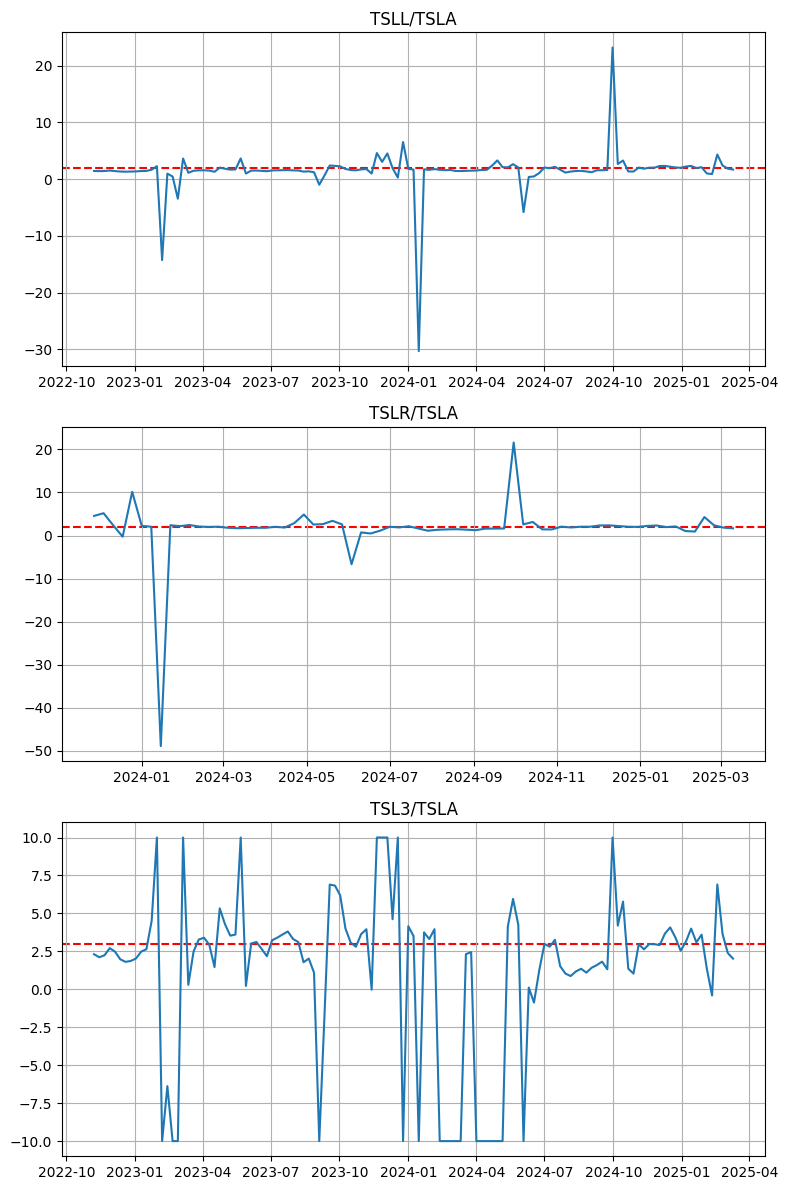

In [6]:

df['TSLLx'] = df['TSLL'] / df['TSLA']
df['TSLRx'] = df['TSLR'] / df['TSLA']
df['TSL3x'] = df['TSL3.L'] / df['TSLA']

print(f'TSLL/TSLA: {df.TSLLx.median()}')
print(f'TSLR/TSLA: {df.TSLRx.median()}')
print(f'TSL3/TSLA: {df.TSL3x.median()}')

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 12))

df.TSLLx.plot(ax=axes[0])
axes[0].axhline(y=2, color='r', linestyle='--', zorder=1)
axes[0].grid()
axes[0].set_title('TSLL/TSLA')

df.TSLRx.plot(ax=axes[1])
axes[1].axhline(y=2, color='r', linestyle='--', zorder=1)
axes[1].grid()
axes[1].set_title('TSLR/TSLA')

df.TSL3x.clip(-10,10).plot(ax=axes[2])
axes[2].axhline(y=3, color='r', linestyle='--', zorder=1)
axes[2].grid()
axes[2].set_title('TSL3/TSLA')

plt.tight_layout()


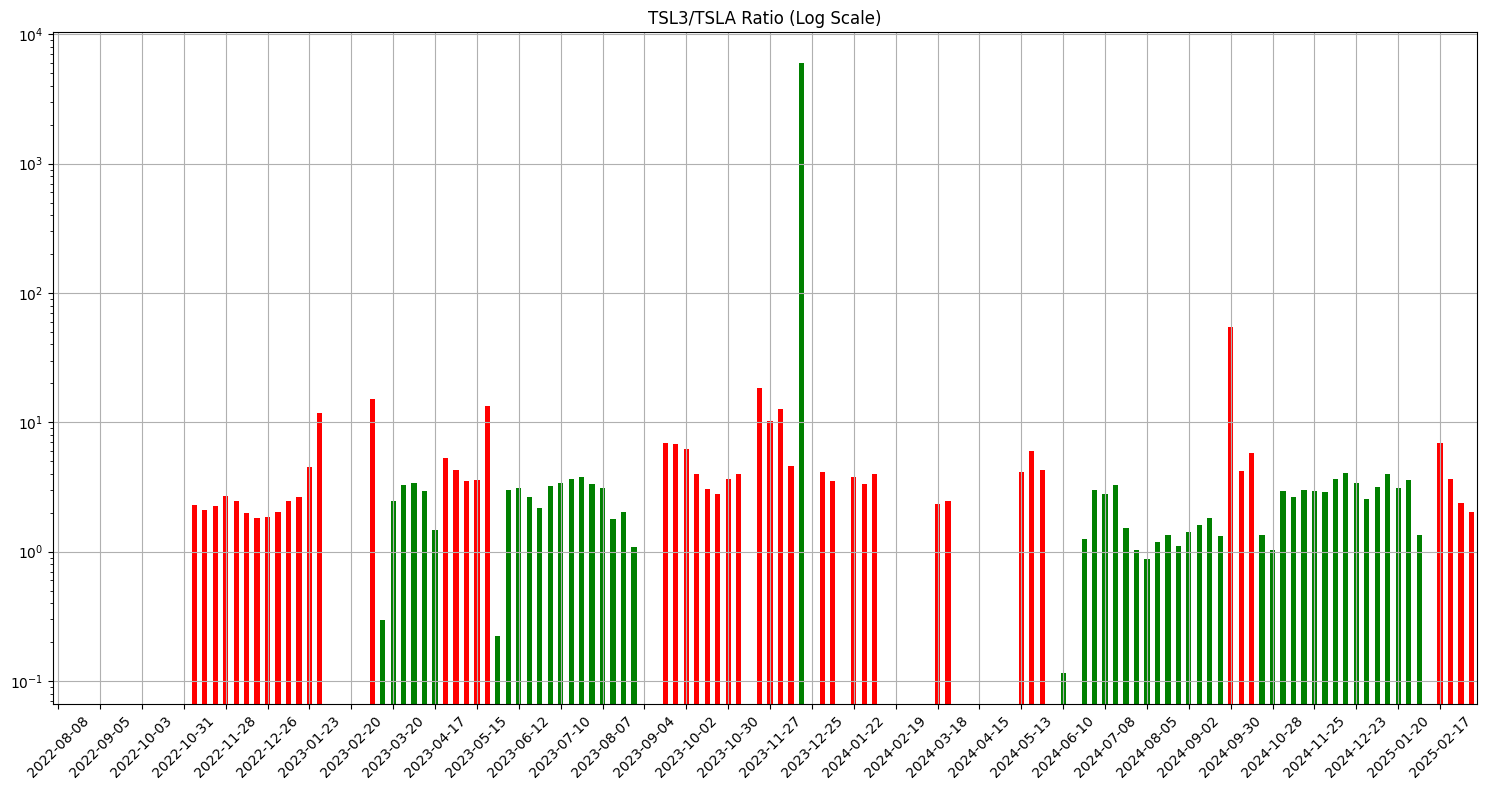

In [11]:
plt.figure(figsize=(15, 8))
colors = ['green' if x > 0 else 'red' for x in df['TSLA']]
df['TSL3x'].plot(kind='bar', color=colors)
plt.yscale('log')
plt.grid(True)
plt.title('TSL3/TSLA Ratio (Log Scale)')
plt.xticks(range(0, len(df.index), 4), [str(x) for x in df.index[::4]], rotation=45)
plt.tight_layout()

In [12]:
tsla_positive = df['TSL3x'][df['TSLA'] > 0].median()
tsla_negative = df['TSL3x'][df['TSLA'] < 0].median()

print(f"TSL3x median when TSLA is positive: {tsla_positive:.3f}")
print(f"TSL3x median when TSLA is negative: {tsla_negative:.3f}")

TSL3x median when TSLA is positive: 2.024
TSL3x median when TSLA is negative: 3.411
